![Insper](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true)

# Insper Pós-Graduação
## Programa Avançado em Data Science e Decisão [»](https://www.insper.edu.br/pos-graduacao/programas-avancados/data-science-e-decisao/)

## Mineirando dados na WEB

A mineração de dados (Data Mining) é um processo de extração e descoberta de padrões em grandes conjuntos de dados envolvendo métodos na interseção de aprendizado de máquina, estatísticas e sistemas de banco de dados. Quando não há WEB API ou acesso a bancos de dados, podemos minerar os dados de páginas WEB, arquivos PDF ou imagens (OCR), etc..

- Coleta de dados na Web: crawlers e scraping.
- Hackear sites: _use este conhecimento somente para o BEM!_

É possível obter dados ne páginas WEB não estruturadas, quando não há APIs ou serviços para obter estas informações.

- web-scraping: Carrega os dados de uma página e separa as informações relevantes
- web-crawler: Busca por páginas em cascata por meio dos links e realiza web-scraping

É básicamente o mecanismo que as ferramentas de busca fazem para indexar as páginas na Internet.

Vamos usar:

- **requests**: para obter a página WEB ou arquivo CSV, TSV, TXT, XML, etc... e chamada de WEB API (JSON)
- **regexp** (Expressões Regulares): Para buscar padrões em texto livro não estruturado
- **beautifulsoup4**: Para fazer o parse de páginas HTML e buscar os dados conforme as TAGS HTML
- **Selenium**: Para usar o browser como marionete, e imitar um usuário humano...

<div style="color: white; background-color: darkred; padding: 10px;">
Algumas coisas podem dar errado nesta aula!!! ☠️
</div>

Há batalhas épicas ocorrendo na WEB neste exato momento!!!<br>
A Internet é uma rede perigosa! Há riscos!!<br>
Sistemas inteligentes tentam detectar instrusos, e separar bons e maus usuários!<br>
Há robôs obtendo dados se passando por humanos, e há robôs buscando por outros robôs para neutraliza-los!<br>
Os "web scrapers" podem ser considerados uma ameaça!<br>
No entanto! O Google faz isso para viver!! Vasculha e acessa os sites com seus exércitos de robôs!<br>

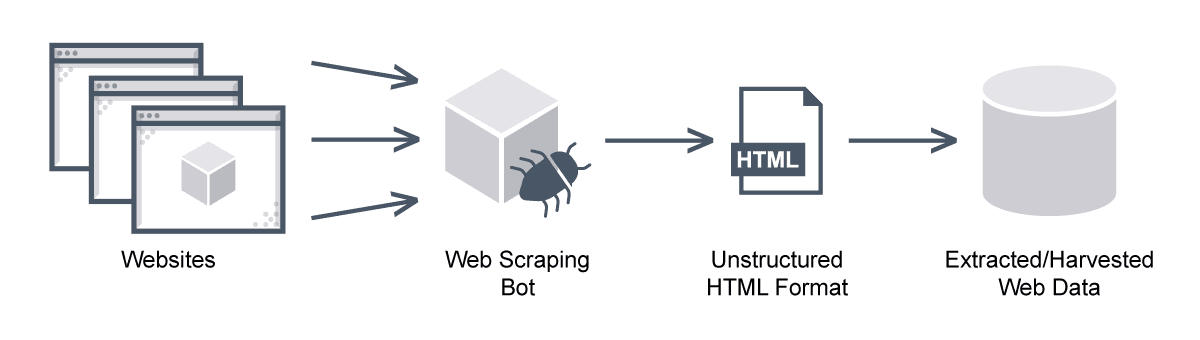

https://avinetworks.com/glossary/web-scraping/

### Carregar dados de uma página web

In [ ]:
import requests

response = requests.get('https://www.nytimes.com/')

In [ ]:
response.text

In [ ]:
type(_)

Experimente abrir esta página WEB no browser: https://www.nytimes.com/

E pressione **Ctrl + Shift + I** para ver o código fonte entrando em modo DEVELOPER

Importando aquivo CSV direto de uma URL (Download), modo RAIZ

In [ ]:
raw_csv = requests.get("https://danielscarvalho.github.io/Insper-BigData/TechCrunchcontinentalUSA.csv")

In [ ]:
raw_csv.text

Resgatando a ideia de texto, characterset

- Latin
- UTF-8
- ASCII

In [ ]:
import sys

sys.getsizeof("Vai corinthians!") #retorna o valor do objeto na memória em bytes

In [ ]:
len("Vai corinthians!")

In [ ]:
len("João")

In [ ]:
"João".encode()

In [ ]:
len("João".encode())

In [ ]:
sys.getsizeof("João")

In [ ]:
"João".upper()

In [ ]:
sys.getsizeof(raw_csv.text)

In [ ]:
import pandas as pd

**Desafio:** Processar os dados do arquivo CSV e gerar gráficos...

Agora modo NUTELA:

# Eu ❤️ 🐼

In [ ]:
tc_pd=pd.read_csv("https://danielscarvalho.github.io/Insper-BigData/TechCrunchcontinentalUSA.csv")

In [ ]:
tc_pd

In [ ]:
sys.getsizeof(tc_pd)

### Expressões regulares (regexp)

Expressões regulares (regexp) são extremamente úteis para manipuação de strings e reconhecimento de padrões, porém tem uma simtaxe complexa.

Servem para realizar análise de documentos e dados não estruturados, fazer busca de padrões em textos entre outros.

Regexp podem ser utilizadas em diversas linguagens de programação e no shell dos sistemas operacionais.

Meta caracteres das expressões regulares:

```regexp
. ^ $ * + ? { } [ ] \ | ( )
```

Referência:

- [Regexp How To](https://docs.python.org/3.6/howto/regex.html)
- [Re](https://docs.python.org/3.6/library/re.html)
- [regexr](https://regexr.com/)
- [rexegg](https://www.rexegg.com/regex-quickstart.html)

Para testar online:

- https://regex101.com/
- https://regexr.com/

Vamos utilizar regexp (Expressões Regulares) para encontrar dados em textos da Internet. As páginas WEB são na maioria dos casos desenvolvidas em HTML, que consiste em um arquivo texto (UTF-8) com tags no padrão da linguagem de marcação 
[HTML5](https://developer.mozilla.org/pt-BR/docs/Web/HTML/HTML5).

Tag HTML, exemplos:

```html
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
</head>
<body>
    <h1>Insper</h1>
    <h2>HTML é irado!</h2>
    <p>Aqui está meu texto em <strong>destaque</strong></p>!!
    <p>Aqui está meu texto em <b>negrito</b></p>!!
    <footer>Aqui está meu rodapé</footer>
</body>
</html>
```

Tag HTML de link:

```html
<a href="http://www.insper.edu">Insper</a>
```

Parâmetro **href** tem seu conteúdo (o link) definido entre ' ' ou " "

Para relembrar... podemos criar strings com aspas usando: ''' '''

In [ ]:
c="""Vai \"Corinthians!!\"""" #Contra barra é o ESCAPE

In [ ]:
c

In [ ]:
nome='''"Dr"José D'avila'''
nome

In [ ]:
nome.encode()

In [ ]:
import re

In [ ]:
regExpHref = '''href=["'](http.[^"']+)["']''' #string com padrão regexp de URL (básico)

for i in re.findall(regExpHref, response.text, re.I): # re.I:  Ignore case
    print (i) 

In [ ]:
import re

regExpHref = '''href=["'](http.[^"']+)["']''' #padrão de URL

arquivo = open('Bases/urls.txt','w') #cria arquivo novo fazio

for i in re.findall(regExpHref, response.text, re.I):
    arquivo.write(i + '\n') #grava dado no arquivo, linha texto com url
    
arquivo.close() #salva arquivo

In [ ]:
!dir Bases/*.txt

In [ ]:
!ls -l Bases/*.txt

In [ ]:
!head Bases/urls.txt #Linux ou Mac

In [ ]:
sourceURL='https://www.infis.ufu.br/infis/equipe/corpo-docente'

webPage = requests.get(sourceURL).text

In [ ]:
webPage

In [ ]:
regExpEmail = '[\w\.-]+@[\w\.-]+' #padrão SIMPLES de E-Mail

re.findall(regExpEmail, webPage)

In [ ]:
regExpPhone='[0-9]*-[0-9]{3}-[0-9]{4}' #Padrão de telefone americano
sourceURLPhone="https://www.lambtoncollege.ca/custom/Pages/Contact/"

re.findall(regExpPhone, requests.get(sourceURLPhone).text)

In [ ]:
sourceURLPhone="https://www.infis.ufu.br/infis/equipe/corpo-docente"

ufu_page = requests.get(sourceURLPhone).text

In [ ]:
regExpPhone='\+55\ [0-9\-\ ]*' #Padrão de telefone 
## +55 34 3291-5920 R:5920

re.findall(regExpPhone, ufu_page)

In [ ]:
regExpPhone='\([0-9]{2}\)*\s[0-9]{4}\s-\s[0-9]{4}' #Padrão de telefone brasileiro
sourceURLPhone="http://www.mpsp.mp.br/portal/pls/portal/USR_LISTTEL.LISTA_TELEFONICA_RELATORIO_APP.show?p_arg_names=id_regiao&p_arg_values=1&p_arg_names=id_cidade&p_arg_values=&p_arg_names=id_localidade&p_arg_values=&p_arg_names=id_randomico&p_arg_values=49"

re.findall(regExpPhone, requests.get(sourceURLPhone).text)


### Analisando páginas WEB por tags HTML (Parse)

Parse: Entender o texto HTML em forma de árvore (DOM - Document Object Model)

Código HTML básico:

```HTML
<!DOCTYPE html>
<HTML lang="PT-BR">
  <HEAD>
    <TITLE>Oi!</TITLE>
    <meta charset="UTF-8">
  </HEAD>
  <!-- início do doc -->
  <BODY>
    <img src="https://www.insper.edu.br/wp-content/themes/insper_responsive/images/insper-preto.png">
    <H1>Big Data</H1>
    <H2>Curso...</H2>
    <P>Curso de <strong>Big Data</strong> do Insper</P>
    <A href="http://www.insper.edu.br">Site do Insper</A>
    <hr>
    <table>
       <tr><th>Número</th><th>Valor</th></tr>
       <tr><td>1</td><td>100</td></tr>
       <tr><td>2</td><td>200</td></tr>
    </table>
    <br>
    <img src="http://cdn2-www.dogtime.com/wp-content/themes/dogtime/images/breed-center-300x90.gif">
  </BODY>
</HTML>
```

Para aprender HTML5:

- [W3Schools](https://www.w3schools.com/html/)
- [MDN HTML](https://developer.mozilla.org/pt-BR/docs/Web/HTML)

Para simplificar a busca de tags HTML nas páginas WEB, podemos utilizar a biblioteca *BeutifulSoup*.<br>
O processo de PARSE do HTML, processa o arquivo texto e torna os dados disponíveis e acessíveis em uma estrutura de árvore onde podemos navegar.

## Vamos procurar pela "Sarah Connor"

In [ ]:
!pip install beautifulsoup4

https://www.yellowpages.com/search?search_terms=sarah+connor&geo_location_terms=nyc

In [ ]:
from bs4 import BeautifulSoup as bs

#result = requests.get("http://www.whitepages.com/name/Sarah-Connor")
result = requests.get('https://www.yellowpages.com/search?search_terms=' +
                      'sarah+connor&geo_location_terms=nyc')
soup = bs(result.content, 'html.parser')

soup

In [ ]:
type(soup)

In [ ]:
soup.original_encoding

No browser Chrome ou Firefox utilize o recurso de inspeção da página para ver o código fonte HTML, teclas *Ctrl + Shift + i* ou *F10* (No Mac Option + ⌘ + C).

As páginas WEB são programadas criados com a trinca: HTML, JavaScript e CSS, são todos arquivos texto, porém há outros objetos como Flash, imagens, vídeo, som entre outros...

In [ ]:
tags = soup.find_all('h3')

for val in tags:
    print(val)

In [ ]:
tags

In [ ]:
type(tags[0])

In [ ]:
tags[0].text

In [ ]:
type(tags[0].text)

In [ ]:
#soup.find_all('span', itemprop='name')
tags = soup.find_all('div', {"class": "info"})

info=[]

for name in tags:
    #coisinha = name.find_all('span')[0]
    #print(name.find_all('span')[0].text)
    #print(name.find_all('div',{"class": "phones phone primary"})[0].text)
    line=dict()
    line["name"]=name.find_all('span')[0].text
    line["phone"]=name.find_all('div',{"class": "phones phone primary"})[0].text
    line["address"]=name.find_all('div',{'class':'street-address'})[0].text
    info.append(line)
    
info

#soup.find_all('span')

#<span itemprop="name">
#   <span itemprop="givenName">Sarah</span> <span itemprop="familyName">Connor</span>
#</span>

In [ ]:
import pandas as pd

TerminatorDF = pd.DataFrame.from_dict(info)

TerminatorDF

Acho que a Sarah Connor não é nossa contemporânea, ou é claro por segurança ela não tem telefone registrado em seu nome!!!

> Hasta la vista, baby!! - Terminator

### Minerando páginas complexas - Bitcoin

Páginas WEB modernas utilizam o conceito de "single page app" e são projetadas de forma que o layout HTML da página seja gerada dinamicamente no browser em JavaScript de forma responsiva, que por sua fez faz requisições há serviços REST/JSON para obter os dados.

Desta forma é necessário utilizar um Browser para renderizar a página WEB complexas e dinâmicas.

Para isso vamos utilizar a biblioteca [selenium](http://www.seleniumhq.org/) e o Firefox por meio do Geckodriver (marionete)

Referência:

- [Geckodriver](https://github.com/mozilla/geckodriver) - Firefox
- [Geckodriver - Download](https://github.com/mozilla/geckodriver/releases)
- [Chromedriver](https://chromedriver.chromium.org/downloads)

In [ ]:
from bs4 import BeautifulSoup as bs

#result = requests.get('https://charts.bitcoin.com/bch/') # Esta URL não existe mais...
result = requests.get('https://markets.bitcoin.com/crypto/BCH/')

soup = bs(result.content, 'html.parser')

#<p class="display-4" id="bb-price">$325.79<span class="arrow up"></span></p>

#soup.find("p", { "id" : "bb-price" })

#bitc=soup.find_all("div", { "class" : "styled__Price-sc-1ie6vow-5 kWJIQg" })
#bitc=soup.find_all("div", { "class" : "sc-1a7ju4v-5 kYZUrO" })

#<span class="sc-cRctdL faeIQu">$634.91</span>
bitc=soup.find_all("span", { "class" : "sc-cRctdL faeIQu" })
bitc2=soup.find_all("span")


In [ ]:
bitc

In [ ]:
bitc2

> Ops!! Cade os dados que vemos na página??

In [ ]:
!pip install selenium

In [ ]:
#Marionete do Firefox

from bs4 import BeautifulSoup as bs #Faz parser de HTML
from selenium import webdriver      #Controla o browser (marionete)
import time

gd='geckodriver'
sourceUrl='https://charts.bitcoin.com/bch/'

#webdriver.Chrome
driver = webdriver.Firefox(executable_path=gd)
driver.get(sourceUrl)
time.sleep(10)

#<span class="sc-koaBrS dtjjye">$632.75</span>

soup = bs(driver.page_source, 'html.parser')
#<div class="styled__Price-sc-1ie6vow-5 kWJIQg">$10,506.26</div>
#bitcoin=soup.find("div", { "class" : "styled__Price-sc-1ie6vow-5 kWJIQg" }).getText()
#bitcoin=soup.find("div", { "class" : "sc-1a7ju4v-5 kYZUrO" }).getText()
#bitcoin=soup.find_all("span", { "class" : "sc-cRctdL faeIQu" })
bitcoin = soup.find_all("span", { "class" : "sc-koaBrS dtjjye" })

driver.close()

print(bitcoin)

In [ ]:
#Marionete do Firefox

from bs4 import BeautifulSoup as bs #Faz parser de HTML
from selenium import webdriver      #Controla o browser (marionete)
import time

sourceUrl='https://charts.bitcoin.com/bch/'

#webdriver.Chrome
driver = webdriver.Chrome()
driver.get(sourceUrl)
time.sleep(10)

#<span class="sc-koaBrS dtjjye">$632.75</span>

soup = bs(driver.page_source, 'html.parser')
#<div class="styled__Price-sc-1ie6vow-5 kWJIQg">$10,506.26</div>
#bitcoin=soup.find("div", { "class" : "styled__Price-sc-1ie6vow-5 kWJIQg" }).getText()
#bitcoin=soup.find("div", { "class" : "sc-1a7ju4v-5 kYZUrO" }).getText()
#bitcoin=soup.find_all("span", { "class" : "sc-cRctdL faeIQu" })
bitcoin = soup.find_all("span", { "class" : "sc-koaBrS dtjjye" })

driver.close()

print(bitcoin)

In [ ]:
type(bitcoin)

In [ ]:
bitcoin

In [ ]:
bitcoin[0].text

In [ ]:
float(bitcoin[0].text.replace("$","")) * 100

Vamos verificar no Linux onde estão os drivers do Firefox (geckodriver) e do Chrome (chromedriver)

In [ ]:
!whereis geckodriver

In [ ]:
!whereis chromedriver

## Que tal um vinho nesse friozinho!!

In [ ]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver #Marionete do Firefox
import time

#gd='C:\soft\geckodriver\geckodriver.exe' #Windows
gd='geckodriver' #Linux ou Mac
sourceUrl='https://www.google.com.br/search?q=wine&tbm=shop'

driver = webdriver.Firefox(executable_path=gd)
driver.get(sourceUrl)
time.sleep(5)

soup = bs(driver.page_source, 'html.parser')

In [ ]:
soup

In [ ]:
#OLD VERSION!!!

divs = soup.findAll('h3',  { "class" : "xsRiS" }) + \
       soup.findAll('span',  { "aria-hidden" : "true" })

In [ ]:
divs

In [ ]:
#<div class="sh-np-h__product-title translate-content" data-merchant-id="114637820" data-offer-id="sku3620005">Kit Finca La Linda Malbec com 6 garrafas</div>
#<b class="translate-content">R$&nbsp;534,00</b>

wine_name = soup.findAll('div',  { "class" : "sh-np__product-title translate-content" }) 
wine_price = soup.findAll('b',  { "class" : "translate-content" })
wine_vendor = soup.findAll('span',  { "class" : "E5ocAb" }) 

In [ ]:
wine_info = list(zip(wine_name, wine_price, wine_vendor))

In [ ]:
wine_info

In [ ]:
wine_info_list=[]

for w in wine_info:
    wine_info_list.append([w[0].text,w[1].text.replace(u"R$\xa0",""),w[2].text])
    
wine_info_list

In [ ]:
wli=pd.DataFrame(wine_info_list)
wli.columns = ['wine','price','vendor']
wli

In [ ]:
#<div class="sh-np__product-title translate-content" data-merchant-id="115365737" data-offer-id="2144435932">Kit Sexteto LFE Signature Series</div>
soup.findAll('div',  { "class" : "sh-np__product-title translate-content" }) 

In [ ]:
#<span class="E5ocAb">Divvino</span>
soup.findAll('span',  { "class" : "E5ocAb" }) 

In [ ]:
list(zip([1,2,3],[88,89,99]))

In [ ]:
list(zip([1,2,3],[88,89,99],[500,600,700]))

In [ ]:
type(_)

In [ ]:
type(_86[0])

Os dados no formato *(1, 111)* são túplas do Python, tem o mesmo comportamento das listas porém são imutáveis.

Para saber mais:

- [Tuplas](https://penseallen.github.io/PensePython2e/12-tuplas.html)

Desafio: Como carregar estes dados em um *data frame* Pandas?

Desafio: Como arrumar os valores em formato computável? .appy()...

Desafio: Conferir se os itens estão com os preços corretos e como ajustar...

In [ ]:
eval('R$65,29'.replace('R$','').replace(',','.')) + 1000

Com Google Chrome...

- Driver... cromedriver
- https://sites.google.com/a/chromium.org/chromedriver/home

In [ ]:
# No caso do Linux, meus drivers para o browser ficam na basta ~/bin: geckodriver e chromedriver
ls ~/bin

In [ ]:
from bs4 import BeautifulSoup as bs
from selenium import webdriver #Marionete do Google Chrome ou Firefox
import time

driver = webdriver.Chrome()
driver.get(sourceUrl)
time.sleep(5)

soup = bs(driver.page_source, 'html.parser')

Temos que inspecionar o código HTML do site para verificar as tags...
> Os sites mudam com frequência seus códigos...

In [ ]:
#<h4 class="Xjkr3b">Petrus 1982 Pomerol Top Guardado Em Adega Particular Clima</h4>
#<span class="a8Pemb OFFNJ">R$45,000.00</span>

divs = zip(soup.findAll('h4',  { "class" : "Xjkr3b" }) , \
           soup.findAll('span',  { "class" : "a8Pemb OFFNJ" }))

In [ ]:
divs

Só se pode interar uma vez no ZIP, depois tem que recarregar, então vamos transformar em uma lista simples

In [ ]:
wine_list = list(divs)

In [ ]:
wine_list

Vamos extrair o texto com nomes e preços de vinho...

In [ ]:
wines=[]
for w in wine_list:
    wines.append([w[0].getText(), \
                  float(w[1].getText().replace(u"R$\xa0","").replace(".","").replace(",",""))/100])
    
wines

In [ ]:
wli2=pd.DataFrame(wines)
wli2.columns = ['wine','price']
wli2

### Como criar um ROBÔ e hackear páginas WEB

![Robot](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/img/robot.png?raw=yes)

In [ ]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

Inspecionar o código da página WEB para buscar o XPATH ou a TAG HTML

In [ ]:
company_code=["petry","erj","vale","bbd","xp","pags"]

In [ ]:
#<span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)">10.40</span>

#     //*[@id="quote-header-info"]/div[3]/div[1]/div/span[1]

tag_xpath = '//*[@id="quote-header-info"]/div[3]/div[1]/div/span[1]'
cname_xpath = '/html/body/div[1]/div/div/div[1]/div/div[2]/div/div/div[5]/div/div[2]/div[1]/div[1]/h1';

driver = webdriver.Firefox()

driver.get("https://finance.yahoo.com/")
time.sleep(5)

yf=[] #Yahoo Finance data

for code in company_code:

    elem = driver.find_element_by_name("s")
    elem.send_keys(code)
    elem.send_keys(Keys.RETURN)
    time.sleep(10)

    value_tag = driver.find_element(By.XPATH, tag_xpath)
    cname_tag = driver.find_element(By.XPATH, cname_xpath)
    yf.append([cname_tag.text, code, value_tag.text])

driver.close()

yf

In [ ]:
yf_pd = pd.DataFrame(yf)
yf_pd.columns = ['Company','Code','Value']
yf_pd

<div style="background-color: lightgreen; padding: 10px;">
    É importante cientistas de dados aprender <b>LaTex</b>, <b>HTML</b> e <b>CSS</b>, que são linguagens de marcação.<br>
    MD vira HTML. Podemos escrever e combinar HTML com MD nas células MARKDOWN.<br>
    A WEB é feita de HTML, e aplicativos para smartphone (57%) e aplicações de smarttv também!
</div>
<br>
https://www.zartis.com/native-vs-hybrid-mobile-app-development/

![](https://i.pinimg.com/originals/ed/30/c9/ed30c9c6975b2a290fb2b42725f66111.jpg)

### Atividade Extra

Minerar os dados das medalhas olimpicas de Tokio 2020 para um dataframe Pandas:
- https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm

Criar um ROBÔ para minerar dados financeiros em:
- https://companiesmarketcap.com/brazil/largest-companies-in-brazil-by-market-cap/

Importar os dados de telefone com pessoas e equipes: 
- http://www.mpsp.mp.br/portal/pls/portal/USR_LISTTEL.LISTA_TELEFONICA_RELATORIO_APP.show?p_arg_names=id_regiao&p_arg_values=1&p_arg_names=id_cidade&p_arg_values=&p_arg_names=id_localidade&p_arg_values=&p_arg_names=id_randomico&p_arg_values=49

### Referências

- https://www.selenium.dev/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
- https://www.w3schools.com/xml/xpath_syntax.asp

Há diversos livros sobre a "ciência" do web scraping:

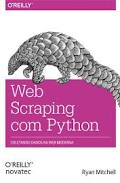
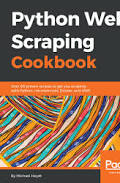
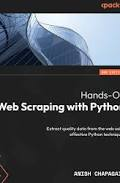